# Importar bibliotecas y leer datos.

In [76]:
# Importar las librerias a utilizar.

import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Ruta del archivo JSON.
rt_json = 'steam_games.json'

# Carga del archivo JSON en un DataFrame.

rows = []               # Lista vacía para almacenar las filas (registros) de datos que obtendremos del archivo JSON.
with open(rt_json) as f:        # Abrimos el archivo JSON en modo lectura usando un bloque 'with', lo que asegura que se cierre correctamente después de su uso.
    for line in f.readlines():          # Iteramos sobre cada línea del archivo JSON usando el método 'readlines()', que devuelve una lista de todas las líneas del archivo.
        rows.append(ast.literal_eval(line))     # Para cada línea, convertimos su contenido en un diccionario Python utilizando 'ast.literal_eval()'.

steam_games = pd.DataFrame(rows)

# EDA = Análisis de datos exploratorio.

* Dataframe shape
* head y tail
* dtypes
* describe

In [78]:
# Observamos las dimensiones de los datos contenidos en nuestro DataFrame.
steam_games.shape

(32135, 16)

In [79]:
# Visualizamos nuestro DataFrame.
steam_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


In [80]:
# Observamos las columnas existentes en nuestro DataFrame.
steam_games.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'discount_price', 'reviews_url', 'specs', 'price',
       'early_access', 'id', 'developer', 'sentiment', 'metascore'],
      dtype='object')

In [81]:
# Analizamos los tipos de datos que contiene cada columna.
steam_games.dtypes

publisher          object
genres             object
app_name           object
title              object
url                object
release_date       object
tags               object
discount_price    float64
reviews_url        object
specs              object
price              object
early_access         bool
id                 object
developer          object
sentiment          object
metascore          object
dtype: object

In [82]:
# Visión general de estadísticas descriptivas de los datos numéricos.
steam_games.describe()

,discount_price
count,225.000000
mean,11.930533
std,17.492643
min,0.490000
25%,1.390000
50%,4.190000
75%,22.660000
max,139.990000


In [83]:
# Selección de columnas para el analizis de correlación.
columnas = ['discount_price', 'price', 'release_date', 'metascore']
steam_games_filtrado = steam_games[columnas].copy()
steam_games_filtrado.head()

,discount_price,price,release_date,metascore
0,4.49,4.99,2018-01-04,NaN
1,NaN,Free To Play,2018-01-04,NaN
2,NaN,Free to Play,2017-07-24,NaN
3,0.83,0.99,2017-12-07,NaN
4,1.79,2.99,NaN,NaN


In [84]:
# Preparación de la columna 'discount_price' y 'price'
steam_games_filtrado.loc[steam_games_filtrado['discount_price'] == 'Free To Play', 'discount_price'] = '0'
steam_games_filtrado['discount_price'] = pd.to_numeric(steam_games_filtrado['discount_price'], errors='coerce')
steam_games_filtrado.dropna(subset = ['discount_price'], inplace = True)
steam_games_filtrado.loc[steam_games_filtrado['price'] == 'Free To Play', 'price'] = '0'
steam_games_filtrado['price'] = pd.to_numeric(steam_games_filtrado['price'], errors='coerce')
steam_games_filtrado.dropna(subset = ['price'], inplace = True)

In [85]:
# Preparación de la columna 'release_date'.
steam_games_filtrado = steam_games_filtrado.dropna(subset = ['release_date'])
steam_games_filtrado['release_date'] = pd.to_datetime(steam_games_filtrado['release_date'], format='%Y-%m-%d', errors='coerce')
steam_games_filtrado['release_date'] = steam_games_filtrado['release_date'].dt.year
steam_games_filtrado.dropna(subset=['release_date'], inplace=True)
steam_games_filtrado['release_date'] = steam_games_filtrado['release_date'].astype(int)

In [86]:
# Preparación de la columna 'metascore'.
steam_games_filtrado.dropna(subset = ['metascore'], inplace = True)

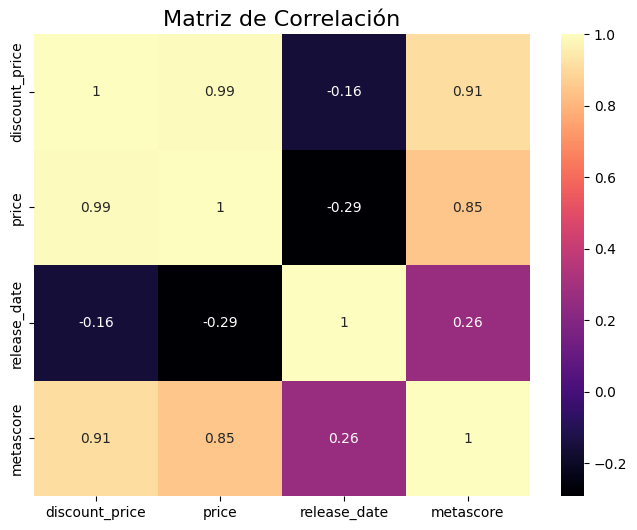

In [87]:
# Análisis de correlaciones.
correlation_matrix = steam_games_filtrado.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'magma')
plt.title('Matriz de Correlación', fontsize = 16)
plt.show()

In [88]:
columnas = ['price']
steam_games_filtrado = steam_games[columnas].copy()

In [89]:
steam_games_filtrado.loc[steam_games_filtrado['price'] == 'Free To Play', 'price'] = '0'
steam_games_filtrado['price'] = pd.to_numeric(steam_games_filtrado['price'], errors='coerce')

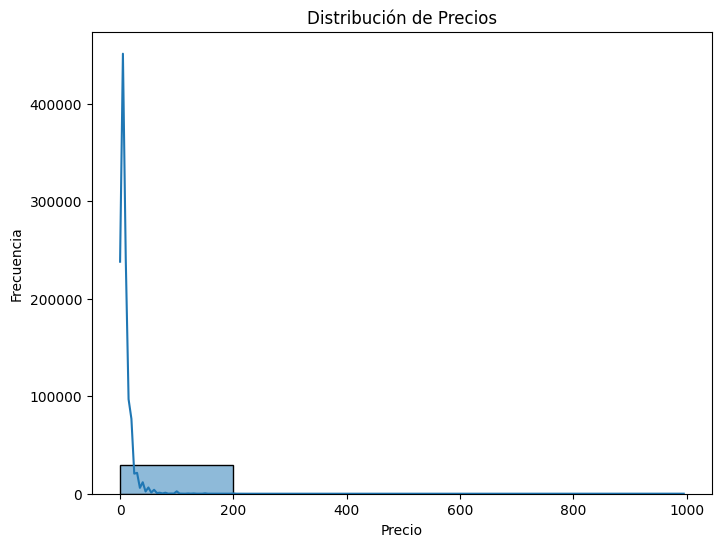

In [90]:
# Distribución de precios.
plt.figure(figsize = (8, 6))
sns.histplot(steam_games_filtrado['price'], bins = 5, kde = True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# ETL = Extracción, transformación y carga de datos.

* Quitar columnas y filas irrelevantes
* Renombrar columnas
* Identificar columnas y filas duplicadas

In [91]:
# Observamos las columnas existentes en nuestro DataFrame.
steam_games.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'discount_price', 'reviews_url', 'specs', 'price',
       'early_access', 'id', 'developer', 'sentiment', 'metascore'],
      dtype='object')

In [92]:
# Quitamos las columnas que no necesitamos, en este caso solo pegamos todas y las quitamos manualmente.
steam_games = steam_games[['publisher', 'genres', 'title', 'release_date',
                           'tags', 'discount_price', 'specs', 'price',
                           'early_access', 'id', 'developer', 'sentiment', 'metascore']].copy()

In [93]:
# Le brindamos un orden más adecuado a las columnas.
orden = ['id', 'title', 'release_date', 'specs',
         'genres', 'tags', 'early_access', 'publisher', 'developer', 
         'sentiment', 'metascore', 'price', 'descount_price']
steam_games = steam_games.reindex(columns = orden)
steam_games.columns

Index(['id', 'title', 'release_date', 'specs', 'genres', 'tags',
       'early_access', 'publisher', 'developer', 'sentiment', 'metascore',
       'price', 'descount_price'],
      dtype='object')

In [94]:
# Observamos las columnas existentes en nuestro DataFrame.
steam_games.head(10)

,id,title,release_date,specs,genres,tags,early_access,publisher,developer,sentiment,metascore,price,descount_price
0,761140,Lost Summoner Kitty,2018-01-04,[Single-player],"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",False,Kotoshiro,Kotoshiro,NaN,NaN,4.99,NaN
1,643980,Ironbound,2018-01-04,"[Single-player, Multi-player, Online Multi-Pla...","[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...",False,"Making Fun, Inc.",Secret Level SRL,Mostly Positive,NaN,Free To Play,NaN
2,670290,Real Pool 3D - Poolians,2017-07-24,"[Single-player, Multi-player, Online Multi-Pla...","[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...",False,Poolians.com,Poolians.com,Mostly Positive,NaN,Free to Play,NaN
3,767400,弹炸人2222,2017-12-07,[Single-player],"[Action, Adventure, Casual]","[Action, Adventure, Casual]",False,彼岸领域,彼岸领域,NaN,NaN,0.99,NaN
4,773570,NaN,NaN,"[Single-player, Full controller support, HTC V...",NaN,"[Action, Indie, Casual, Sports]",False,NaN,NaN,NaN,NaN,2.99,NaN
5,772540,Battle Royale Trainer,2018-01-04,"[Single-player, Steam Achievements]","[Action, Adventure, Simulation]","[Action, Adventure, Simulation, FPS, Shooter, ...",False,Trickjump Games Ltd,Trickjump Games Ltd,Mixed,NaN,3.99,NaN
6,774276,SNOW - All Access Basic Pass,2018-01-04,"[Single-player, Multi-player, Online Multi-Pla...","[Free to Play, Indie, Simulation, Sports]","[Free to Play, Indie, Simulation, Sports]",False,NaN,Poppermost Productions,NaN,NaN,9.99,NaN
7,774277,SNOW - All Access Pro Pass,2018-01-04,"[Single-player, Multi-player, Online Multi-Pla...","[Free to Play, Indie, Simulation, Sports]","[Free to Play, Indie, Simulation, Sports]",False,Poppermost Productions,Poppermost Productions,NaN,NaN,18.99,NaN
8,774278,SNOW - All Access Legend Pass,2018-01-04,"[Single-player, Multi-player, Online Multi-Pla...","[Free to Play, Indie, Simulation, Sports]","[Free to Play, Indie, Simulation, Sports]",False,Poppermost Productions,Poppermost Productions,NaN,NaN,29.99,NaN
9,768800,Race,2018-01-04,"[Single-player, Multi-player, Partial Controll...","[Casual, Indie, Racing, Simulation]","[Indie, Casual, Simulation, Racing]",False,RewindApp,RewindApp,NaN,NaN,NaN,NaN


In [95]:
# Preparamos el tipo de dato en la columna 'release_date'.
steam_games = steam_games.dropna(subset = ['release_date'])
steam_games['release_date'] = pd.to_datetime(steam_games['release_date'], format='%Y-%m-%d', errors='coerce')
steam_games['release_date'] = steam_games['release_date'].dt.year
steam_games.dropna(subset=['release_date'], inplace=True)
steam_games['release_date'] = steam_games['release_date'].astype(int)
steam_games.dtypes

id                 object
title              object
release_date        int32
specs              object
genres             object
tags               object
early_access         bool
publisher          object
developer          object
sentiment          object
metascore          object
price              object
descount_price    float64
dtype: object

In [96]:
# Preparamos el tipo de dato en la columna 'metascore'.
steam_games['metascore'] = pd.to_numeric(steam_games['metascore'], errors = 'coerce')
steam_games.dtypes

id                 object
title              object
release_date        int32
specs              object
genres             object
tags               object
early_access         bool
publisher          object
developer          object
sentiment          object
metascore         float64
price              object
descount_price    float64
dtype: object

In [97]:
# Checkeamos Nulos por columna
total_datos = steam_games.size
datos_no_nulos = steam_games.count()
datos_nulos = steam_games.isnull().sum()
informacion_columnas = pd.DataFrame({'Cantidad de datos': total_datos, 'Datos nulos': datos_nulos, 'Datos no nulos': datos_no_nulos})
informacion_columnas

,Cantidad de datos,Datos nulos,Datos no nulos
id,387179,1,29782
title,387179,1,29782
release_date,387179,0,29783
specs,387179,669,29114
genres,387179,1234,28549
tags,387179,161,29622
early_access,387179,0,29783
publisher,387179,5990,23793
developer,387179,1250,28533
sentiment,387179,6667,23116


In [98]:
steam_games.to_csv('steam_games_procesado.csv', index = False)